# **Tugas 1 : Multiple Linear Regresion**

In [1199]:
# Import Library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [1200]:
# Membaca Data menggunakan pandas dan menampilkan 5 data teratas
data = pd.read_csv('insurance.csv')

## **Nomor 1.**

Memahami Dataset insurance.csv dan identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [1201]:
# Menampilkan 5 data teratas
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [1202]:
# Ukuran Data
data.shape

(1338, 7)

In [1203]:
# Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1204]:
# Deskripsi Data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1205]:
# Pengecekan Missing Value
data.isnull().sum() # Melakukan pengecekan apakah terdapat kolom yang perlu melakukan proses imputasi.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Berdasarkan pengamatan diatas, dapat diambil beberapa point:
- Dataset tersebut memiliki 1338 baris dan 7 kolom yang terdiri dari age, sex, bmi, children, smoker, region, charges
- 4 diantara 7 kolom tersebut adalah kolom yang berisi data numerik, yaitu age, bmi, children, dan charges
- 3 diantara 7 kolom tersebut adalah kolom yang berisi data non-numerikal, yaitu sex, smoker, dan region, sehingga **perlu dilakukan proses encoding**
- Tidak terdapat kolom yang memiliki missing value (kosong), sehingga **tidak perlu dilakukan proses imputasi**

Deskripsi variabel:
- Age       : Umur customer
- Sex       : Jenis kelamin customer
- BMI       : Pengukuran yang diperoleh dengan menghitung berat badan dan tinggi badan untuk menentukan kategori berat customer
- Children  : Jumlah anak dari customer
- Smoker    : Status perokok customer
- Region    : Asal atau wilayah dari customer
- Charges   : Biaya medis personal customer **(Variabel Target)**

##### **Proses Encoding**

In [1206]:
# Proses Encoding
le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

#### **Visualisasi Data**

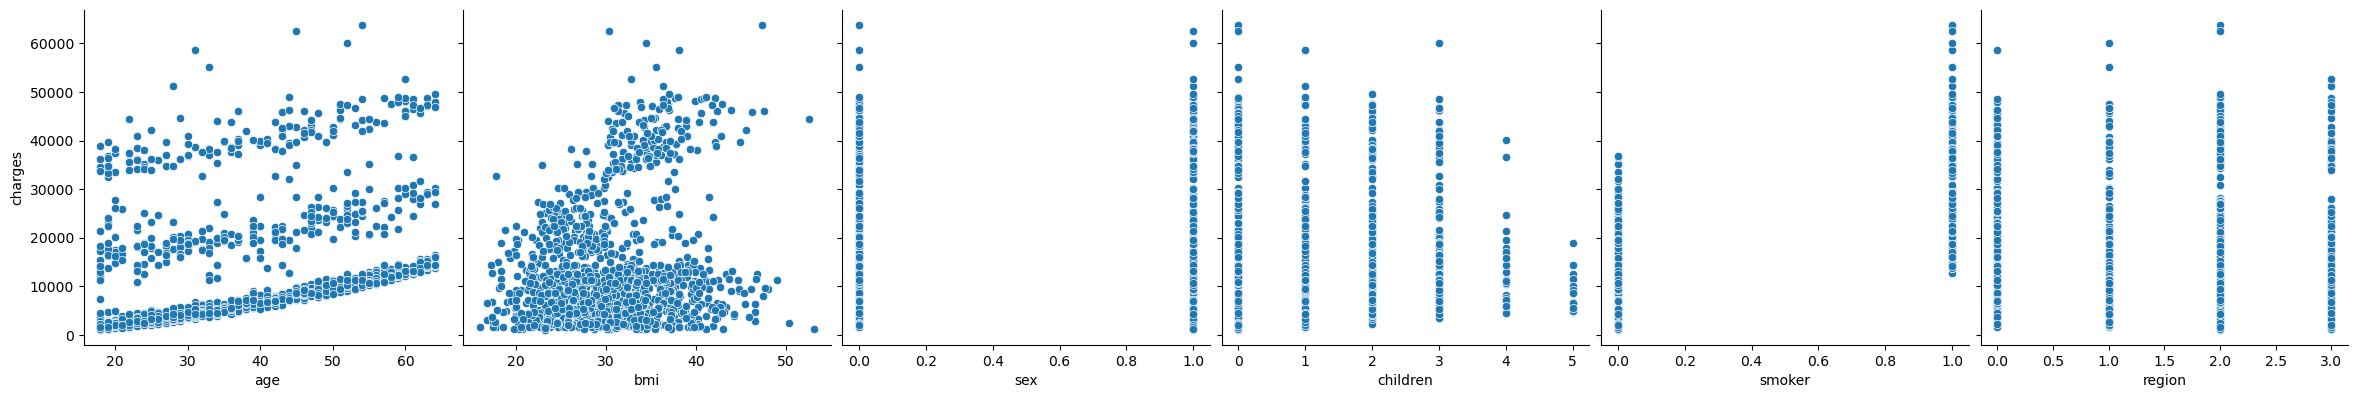

In [1207]:
# Visualisasi Data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'sex', 'children', 'smoker', 'region'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

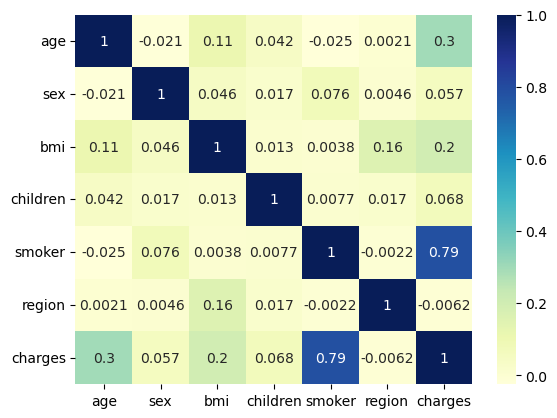

In [1208]:
# Visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Berdasarkan 2 visualisasi data diatas, dapat diambil kesimpulan bahwa Smoker memiliki korelasi yang tertinggi dengan Charges kemudian diikuti oleh BMI dan Age. Pada visualisasi pairplot variabel age, semakin besar value dari variabel age (semakin tua seseorang), maka semakin besar juga value dari variabel charges. Sedangkan pada visualisasi pairplot variabel BMI, value charge naik secara signifikan pada BMI dengan value diatas 30. Peningkatan tersebut dapat disebabkan karena berdasarkan klasifikasi, BMI diatas 30 termasuk dalam kategori obesitas.

Sehingga dapat disimpulkan bahwa variabel yang akan digunakan sebagai variabel bebas (fitur) adalah variabel age, BMI, dan smoker, sedangkan variabel target adalah variabel charges.

## **Nomor 2.**

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

#### **Proses Standarisasi**

#### **Pembagian Dataset**

In [1209]:
# Split Data 8:2
X = data[['age', 'bmi', 'smoker']]
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=911)
y_actual = y_test

## **Nomor 3.**

Lakukan feature scaling jika diperlukan.

In [1210]:
# # Proses Feature Scaling
# # Membuat objek dari StandardScaler
std_X = StandardScaler()
std_y = StandardScaler()

X_train = std_X.fit_transform(X_train)
X_test = std_X.transform(X_test)

y_train = std_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = std_y.transform(y_test.values.reshape(-1, 1))

## **Nomor 4.**

Buat model multiple linear regression menggunakan Scikit-Learn.

In [1211]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)
print('Interceps : \n', model.intercept_)
print('Koefisien : \n', list(zip(X_test,model.coef_)))

Interceps : 
 [-1.44495863e-16]
Koefisien : 
 [(array([-0.39674369,  1.12117947, -0.5174674 ]), array([0.28899301, 0.17466956, 0.78990079]))]


## **Nomor 5.**

Latih model pada data latih dan lakukan prediksi pada data uji.

In [1212]:
mlr = sm.OLS(y_train, X_train).fit()
predictions = mlr.predict(X_train) 
 
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              1004.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                   5.00e-310
Time:                        03:17:16   Log-Likelihood:                         -800.95
No. Observations:                1070   AIC:                                      1608.
Df Residuals:                    1067   BIC:                                      1623.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2890      0.016     18.353      0.000       0.258       0.320
x2             0.1747      0.016     11.097      0.000       0.144       0.206
x3             0.7899      0.016     50.409      0.000       0.759       0.821
==============================================================================
Omnibus:                      242.285   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.106
Skew:                           1.242   Prob(JB):                    1.92e-118
Kurtosis:                       5.448   Cond. No.                         1.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1213]:
y_test_pred = mlr.predict(X_test)
y_test_pred_original = std_y.inverse_transform(y_test_pred.reshape(-1, 1))
mlr_diff = pd.DataFrame({'Actual value': y_actual, 'Predicted value': y_test_pred_original.flatten(), 'Difference': y_actual - y_test_pred_original.flatten()})
mlr_diff.head()

,Actual value,Predicted value,Difference
59,5989.52365,9526.807510,-3537.283860
367,8017.06115,7263.618422,753.442728
919,5245.22690,8694.407728,-3449.180828
1140,9048.02730,13491.850999,-4443.823699
1200,6198.75180,5764.669556,434.082244


## **Nomor 6.**

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [1214]:
# Menghitung r2_score
r_squared = r2_score(y_test, y_test_pred)

# Menghitung mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)

# Menghitung mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nR-squared (R2): {r_squared:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")


R-squared (R2): 0.78
MAE (Mean Absolute Error): 0.33
MSE (Mean Squared Error): 0.21


Berdasarkan hasil diatas, dengan nilai R-squared yang mendekati 1, maka dapat dikatakan bahwa model yang dibuat sudah cukup baik dalam melakukan prediksi. Hal tersebut juga dapat dilihat dari nilai MSE dan MAE yang mendekati 0.

Visualisasi hasil prediksi dengan menggunakan scatter plot 3D.

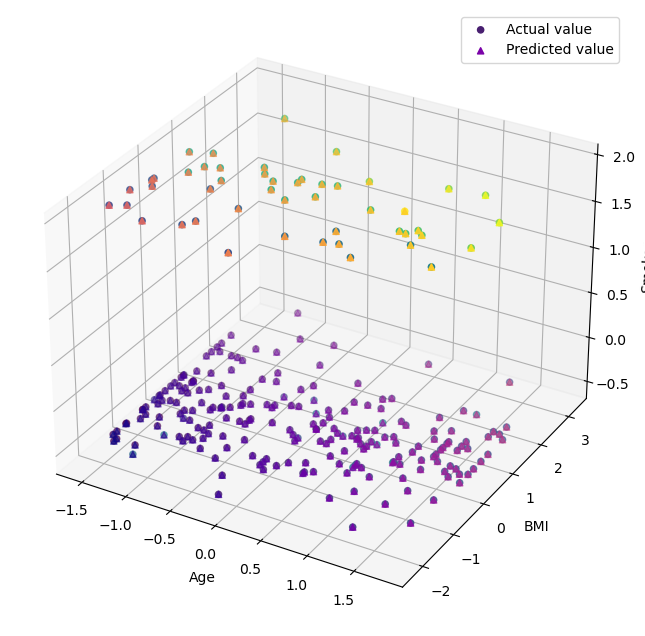

In [1215]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_actual, cmap='viridis', marker='o', label='Actual value')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test_pred_original, cmap='plasma', marker='^', label='Predicted value')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Smoker')

plt.legend()
plt.show()